# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
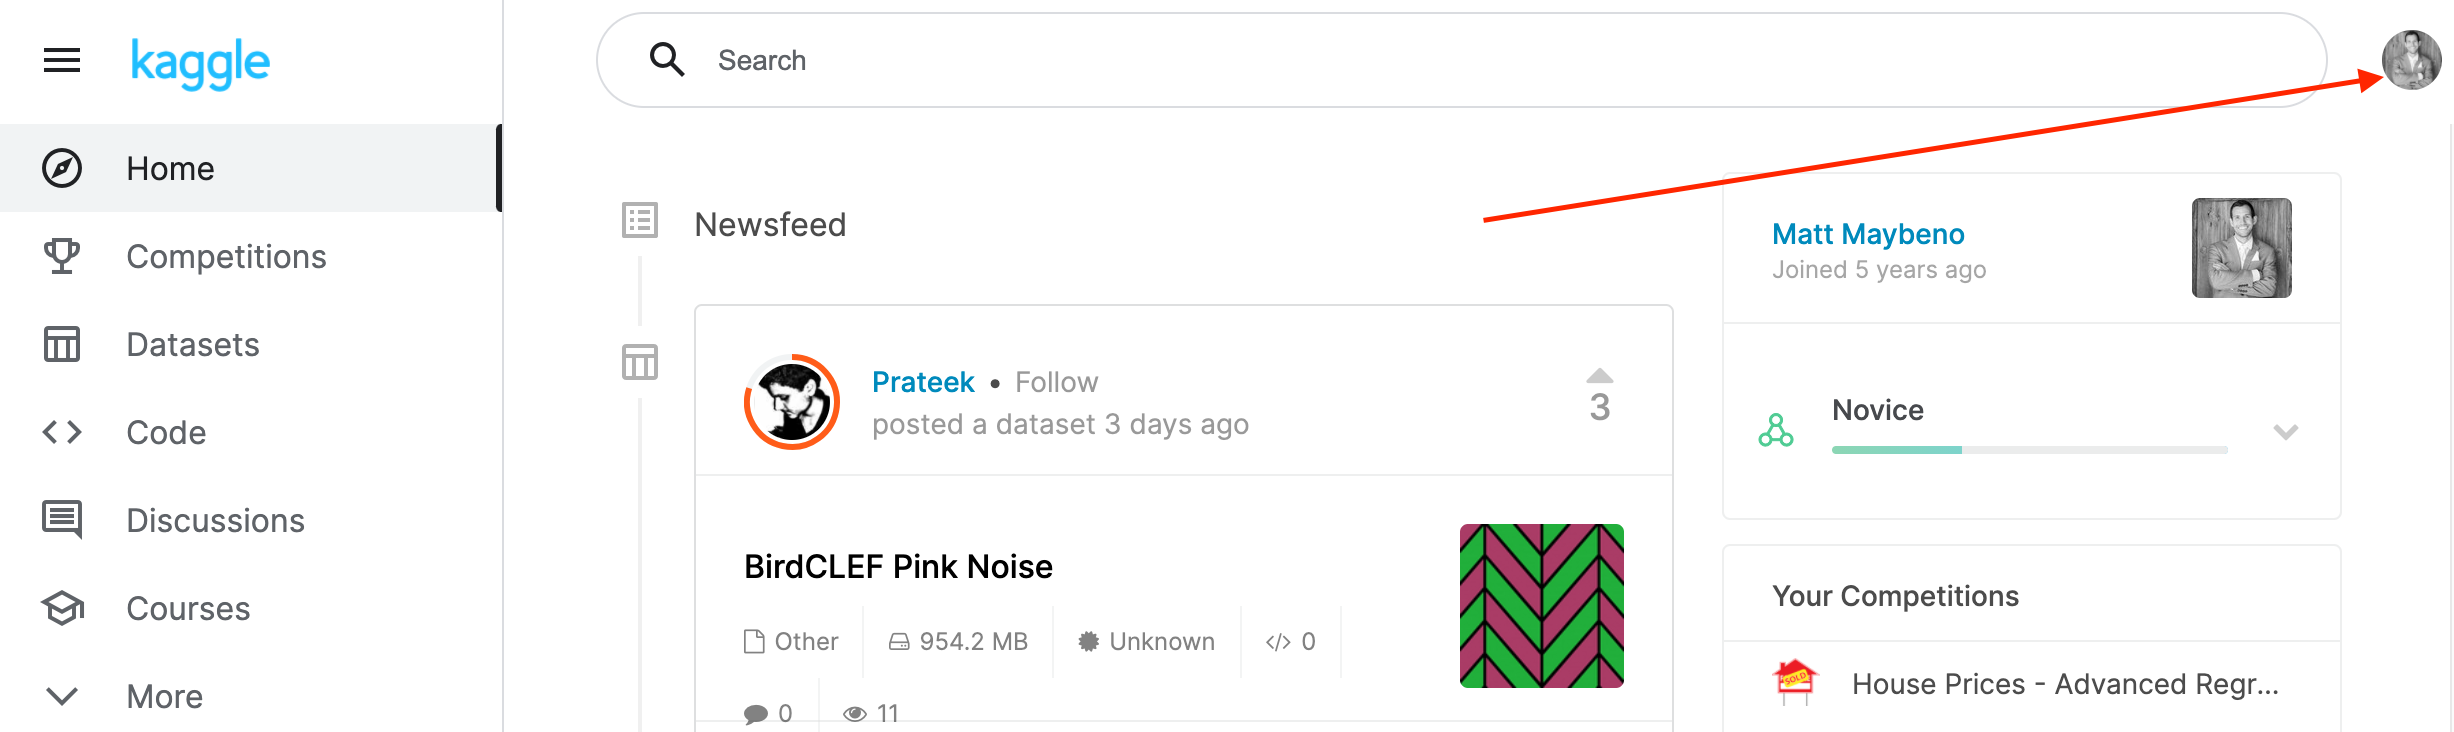
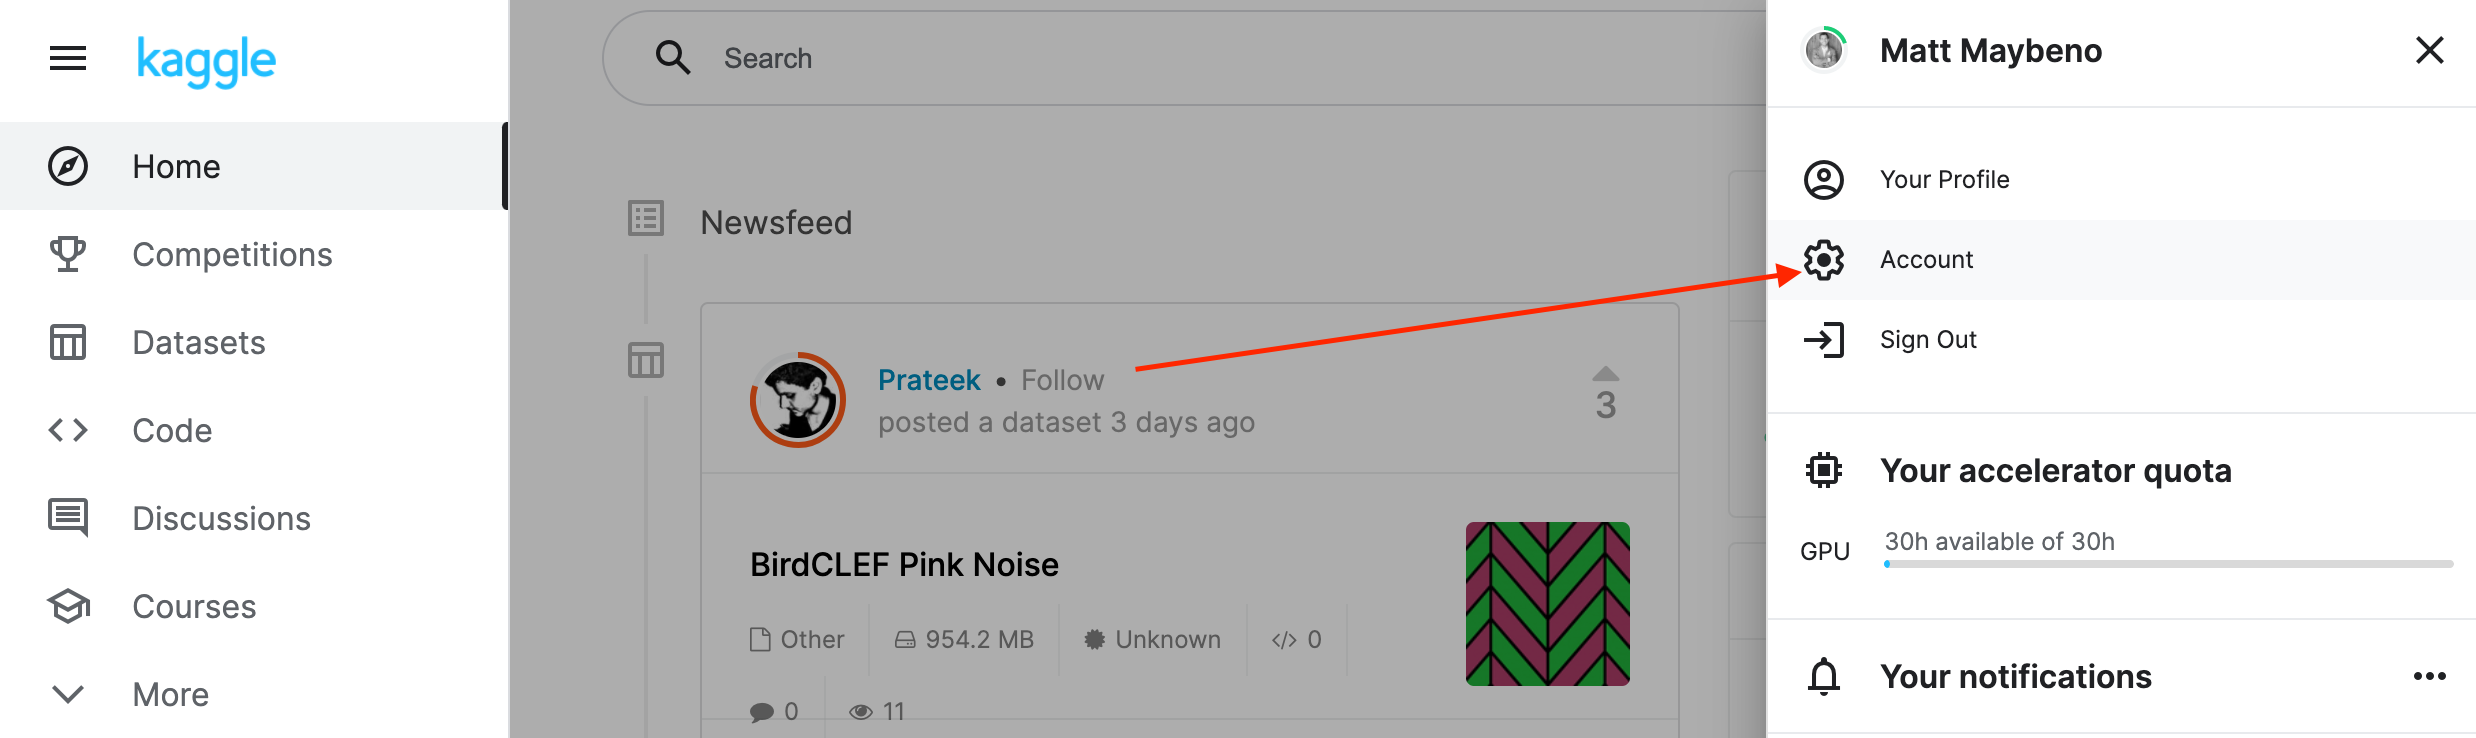
2. Scroll down to API and click Create New API Token.
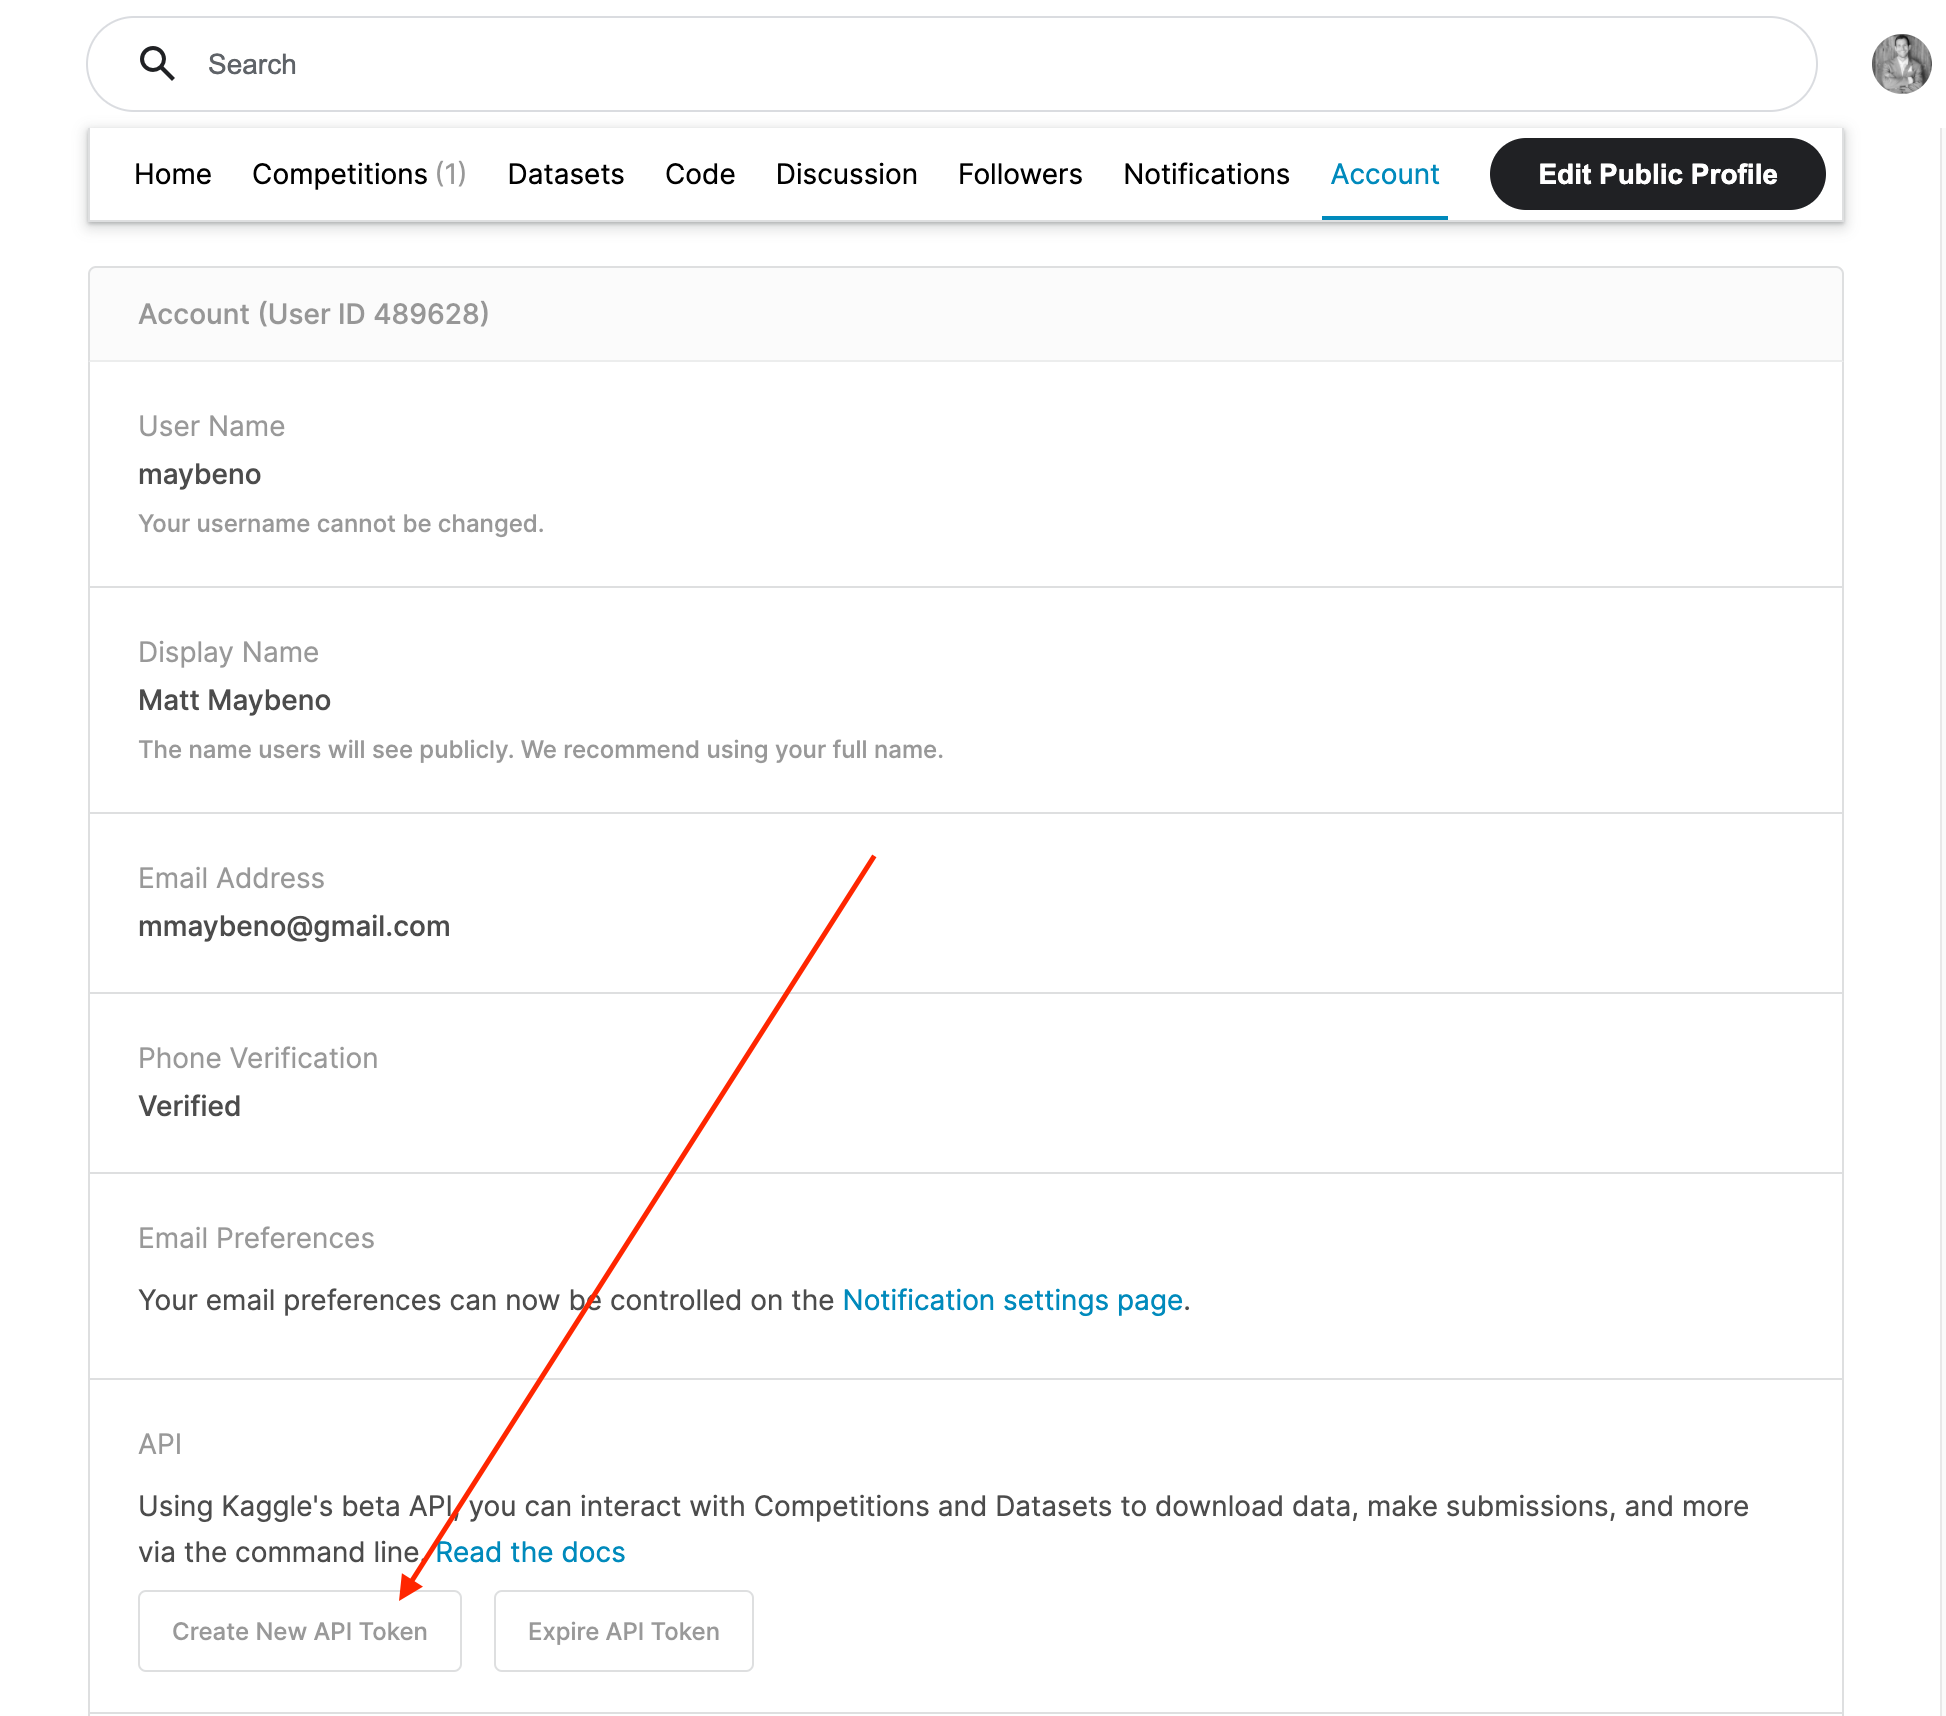
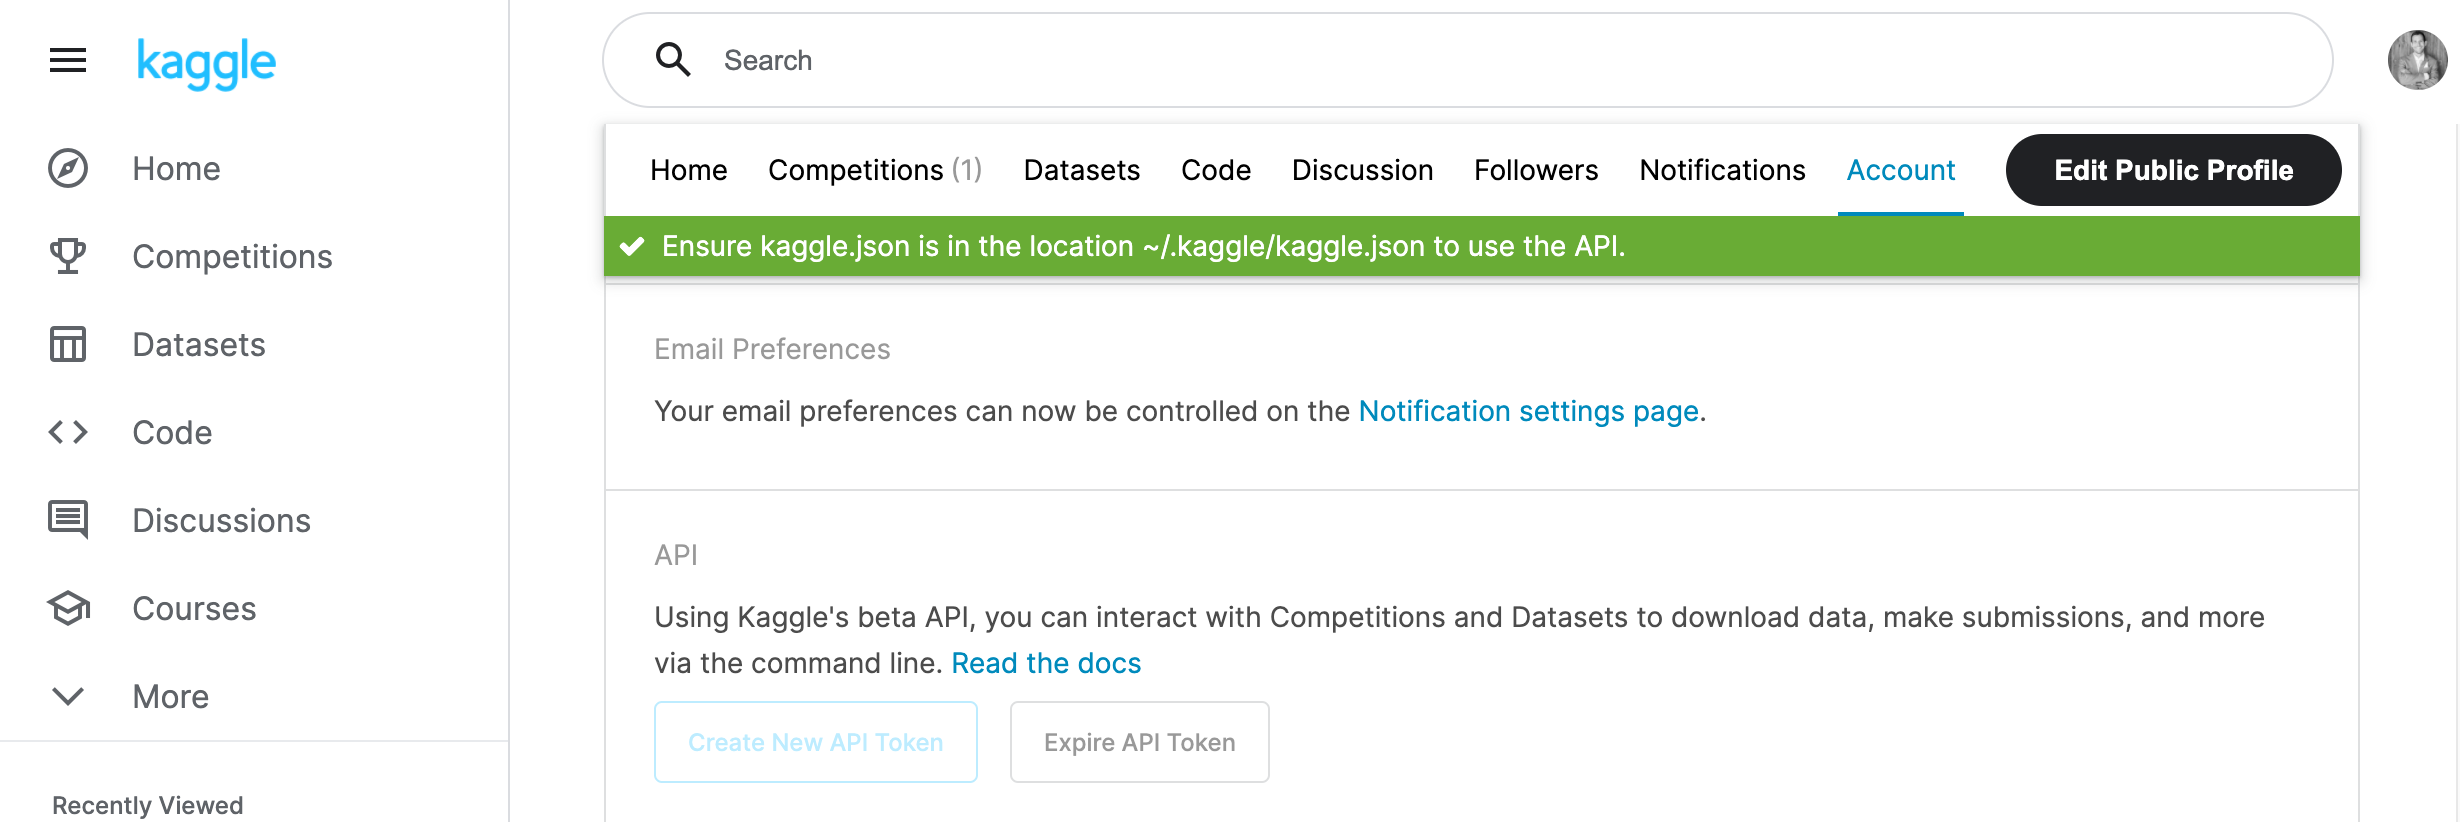
3. Open up `kaggle.json` and use the username and key.
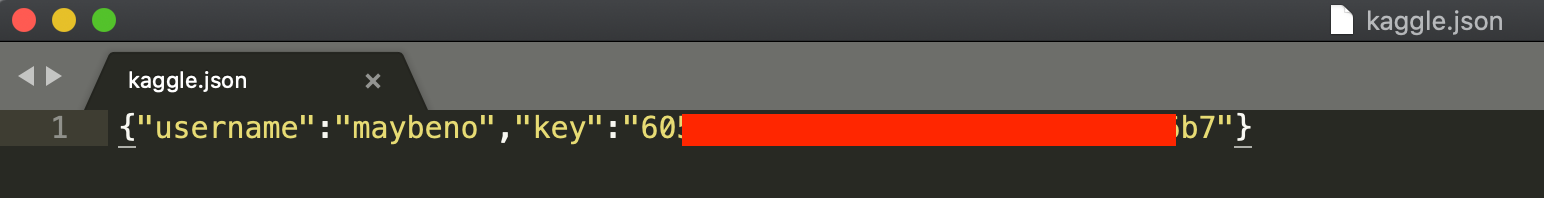

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
!pip install pydantic==1.10.3
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pydantic-1.10.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
Reason for being yanked: See https://github.com/pydantic/pydantic/issues/4885
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.1
    Uninstalling typing-extensions-4.0.1:
      Successfully uninstalled typing-extensions-4.0.1
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-66.0.0-py3-none-any.whl (1.3 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled s

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!pip install kaggle
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)


In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "tanyamohanka"
kaggle_key = "8092ce0be407df997c158fb15ee0a098"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
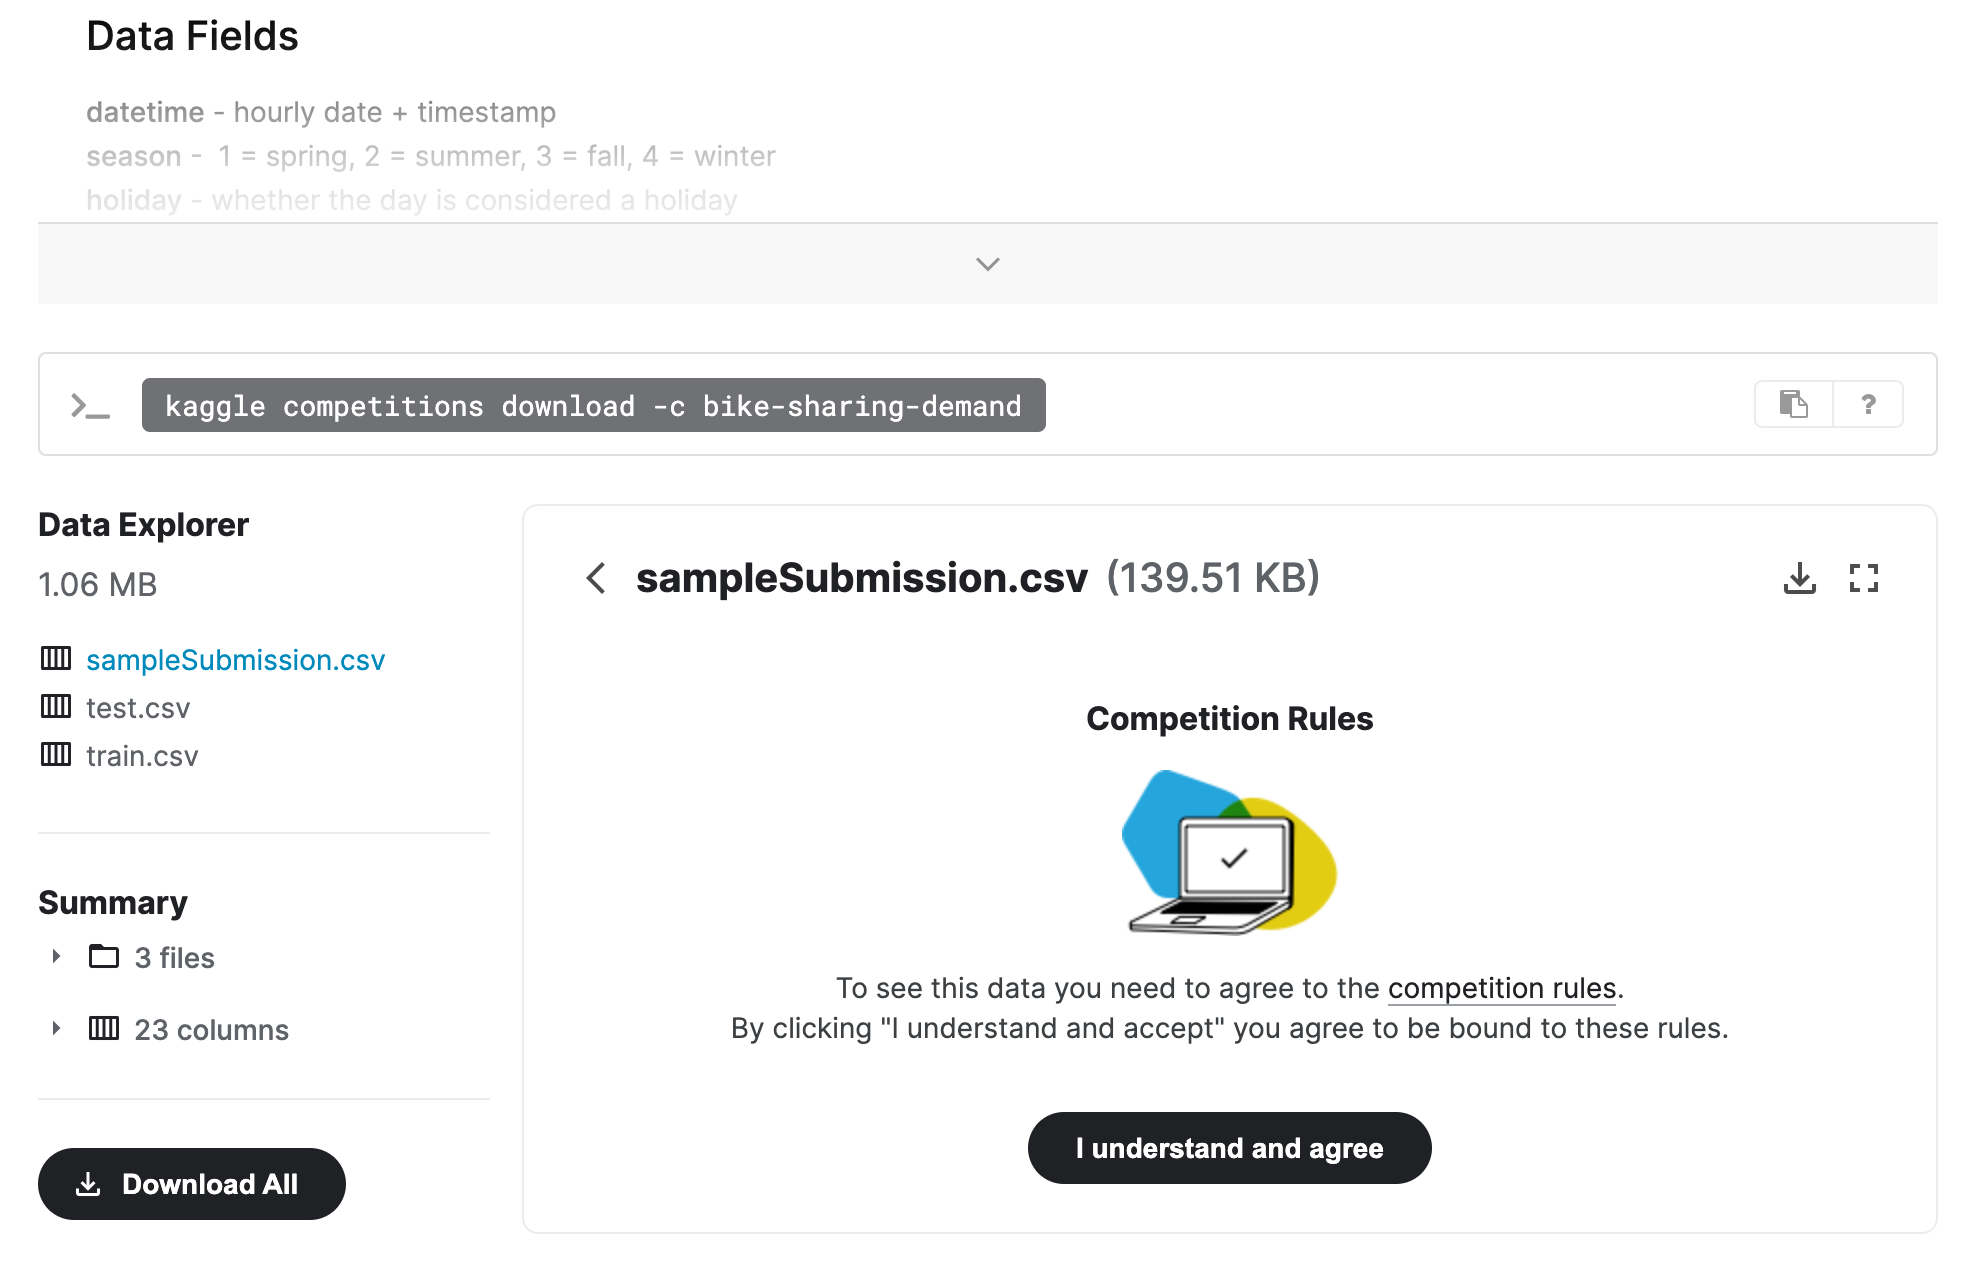

In [6]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip 

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train["datetime"] = pd.to_datetime(train["datetime"])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test["datetime"] = pd.to_datetime(test["datetime"])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [11]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission["datetime"] = pd.to_datetime(submission["datetime"])
submission.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
predictor = TabularPredictor(label="count",
                            eval_metric="root_mean_squared_error").fit(train_data=train.loc[:, ~train.columns.isin(["casual", "registered"])],
                                 time_limit=600,
                                 presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230118_191508/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230118_191508/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -52.556431       2.238617  19.112007                0.000728           0.135630            3       True          8
1    ExtraTreesMSE_BAG_L2  -53.157140       1.699581  10.144996                0.536407           3.128355            2       True          7
2  RandomForestMSE_BAG_L2  -53.220266       1.701482  15.848022                0.538307           8.831380            2       True          6
3   KNeighborsDist_BAG_L1  -84.125061       0.102963   0.027196                0.102963           0.027196            1       True          2
4     WeightedEnsemble_L2  -84.125061       0.103553   0.247537                0.000590           0.220341            2       True          5
5   KNeighborsUnif_BAG_L1 -101.546199       0.102741   0.027561                0.10274

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'RandomForestMSE_BAG_L1': -116.54429428704391,
  'ExtraTreesMSE_BAG_L1': -124.58805258915959,
  'WeightedEnsemble_L2': -84.12506123181602,
  'RandomForestMSE_BAG_L2': -53.22026566077818,
  'ExtraTreesMSE_BAG_L2': -53.157139677682935,
  'WeightedEnsemble_L3': -52.55643086621058},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20230118_191508/models/KNeighborsUnif_BAG_L1/',
  'KNeighbor

### Create predictions from test dataset

In [14]:
predictions = predictor.predict(test)
predictions.head()

0    22.213421
1    40.962395
2    44.579826
3    47.908035
4    51.491283
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean       99.999901
std        90.366615
min         2.169402
25%        18.610256
50%        63.247437
75%       169.233765
max       361.222229
Name: count, dtype: float64

In [16]:
# How many negative values do we have?
len(predictions[predictions <0])

0

In [17]:
# Set them to zero
predictions[predictions<0]=0

### Set predictions to submission dataframe, save, and submit

In [18]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [19]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 337kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [20]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-01-18 19:16:03  first raw submission               complete  1.84484      1.84484       
submission_new_hpo.csv       2023-01-18 15:23:56  new features with hyperparameters  complete  0.55691      0.55691       
submission_new_features.csv  2023-01-18 15:16:45  new features                       complete  0.64809      0.64809       
submission.csv               2023-01-18 15:14:18  first raw submission               complete  1.84484      1.84484       


#### Initial score of 1.84

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

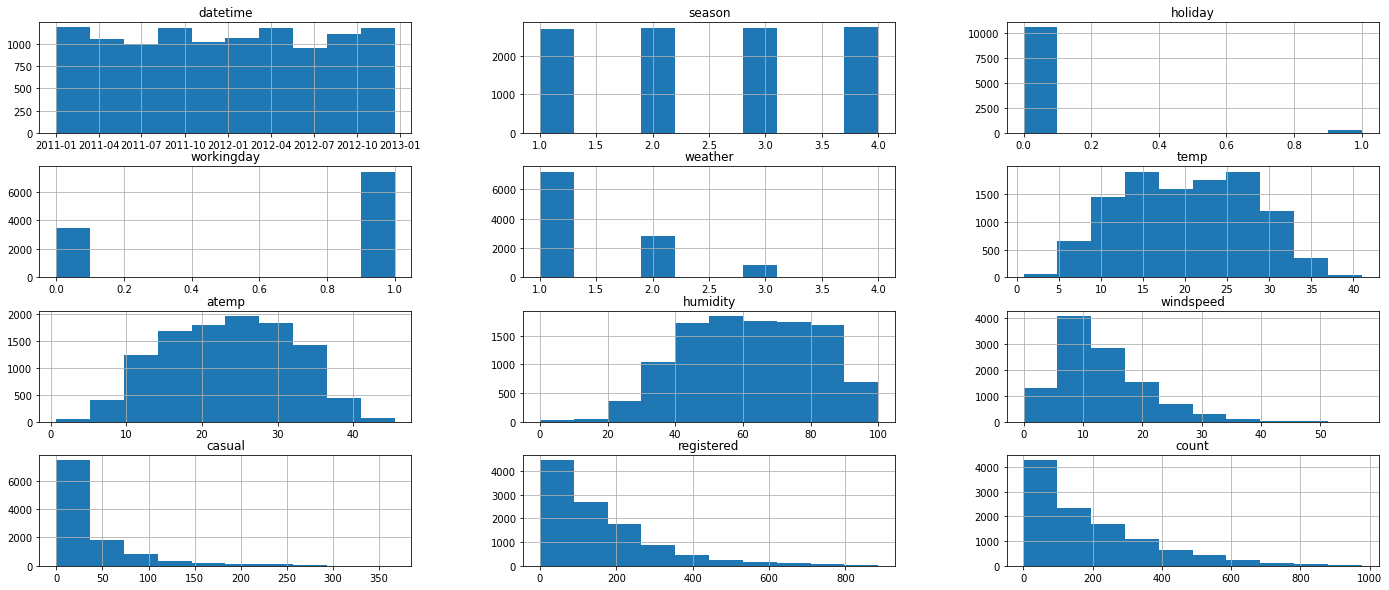

In [21]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(24,10))


In [22]:
# create a new feature
train["hour"] = train["datetime"].dt.hour
train["day"] = train["datetime"].dt.day
train["month"] = train["datetime"].dt.month
test["hour"] =  test["datetime"].dt.hour
test["day"] =  test["datetime"].dt.day
test["month"] =  test["datetime"].dt.month

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [23]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [24]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  day  month  
0        81        0.0       3          13     16     0    1      1  
1        80        0.0       8          32     40     1    1      1  
2        80        0.0       5          27     32     2    1      1  
3        75        0.0       3          10     13     3    1      1  
4        75        0.0       0           1      1     4    1      1

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

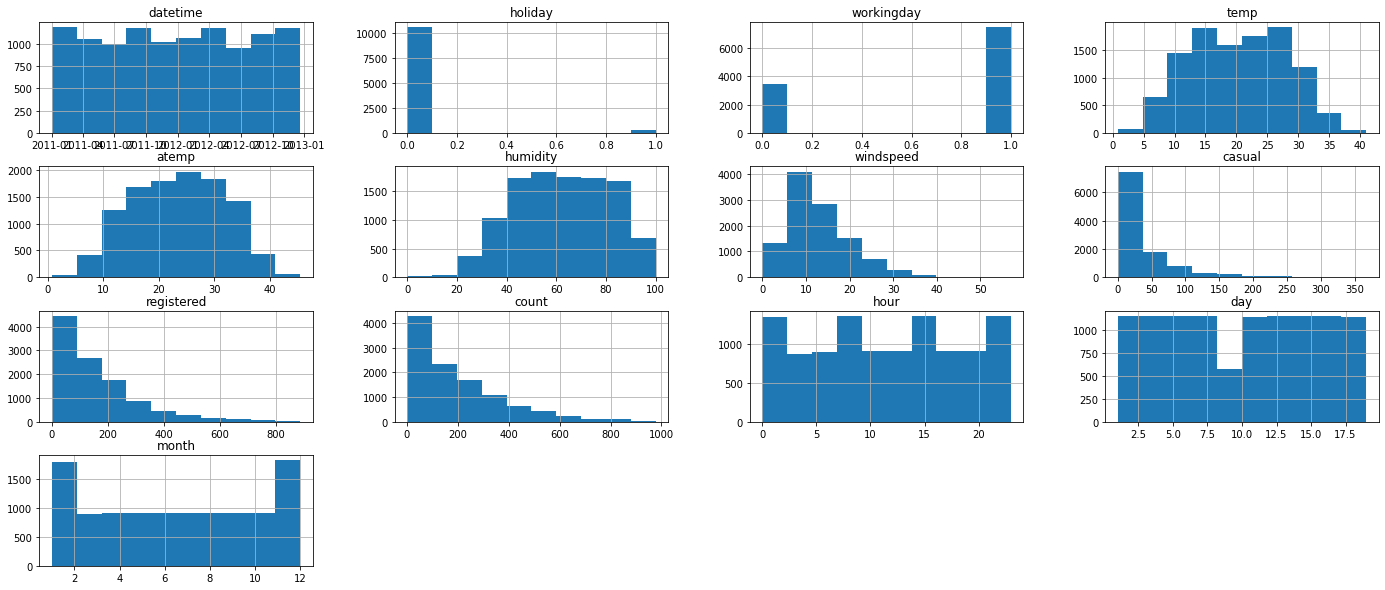

In [25]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(24, 10))


## Step 5: Rerun the model with the same settings as before, just with more features

In [26]:
predictor_new_features = TabularPredictor(label="count",
                                          eval_metric="root_mean_squared_error").fit(
                                              train_data=train.loc[:, ~train.columns.isin(["casual", "registered"])],
                                              time_limit=600,
                                              presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230118_191619/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230118_191619/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [27]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -33.627271       2.309099  23.214171                0.000565           0.136436            3       True          8
1    ExtraTreesMSE_BAG_L2  -33.643448       1.755169  12.640511                0.538203           3.628011            2       True          7
2  RandomForestMSE_BAG_L2  -34.299878       1.770332  19.449723                0.553366          10.437224            2       True          6
3     WeightedEnsemble_L2  -36.954031       1.115219   9.207435                0.000582           0.225511            2       True          5
4    ExtraTreesMSE_BAG_L1  -38.136093       0.498992   2.723643                0.498992           2.723643            1       True          4
5  RandomForestMSE_BAG_L1  -38.404176       0.512616   6.227741                0.51261

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'RandomForestMSE_BAG_L1': -38.40417617363083,
  'ExtraTreesMSE_BAG_L1': -38.136092853992395,
  'WeightedEnsemble_L2': -36.95403123659059,
  'RandomForestMSE_BAG_L2': -34.29987751483917,
  'ExtraTreesMSE_BAG_L2': -33.64344787508117,
  'WeightedEnsemble_L3': -33.62727130669138},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20230118_191619/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsD

In [28]:
# Remember to set all negative values to zero
predictions_new = predictor_new_features.predict(test)
predictions_new.head()
predictions_new.describe()
predictions_new[predictions_new < 0] = 0
submission_new_features = submission.copy()

In [29]:
# Same submitting predictions
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [30]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 187k/187k [00:00<00:00, 340kB/s]
Successfully submitted to Bike Sharing Demand

In [31]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-18 19:17:38  new features                       complete  0.64809      0.64809       
submission.csv               2023-01-18 19:16:03  first raw submission               complete  1.84484      1.84484       
submission_new_hpo.csv       2023-01-18 15:23:56  new features with hyperparameters  complete  0.55691      0.55691       
submission_new_features.csv  2023-01-18 15:16:45  new features                       complete  0.64809      0.64809       


#### New Score of 0.65

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [32]:
import autogluon.core as ag


# Specify hyperparameter values for lightGBM gradient boosted trees
gbm_params = {"num_boost_round": 100, # number of boosting round to control training time of GBM models
              "num_leaves": ag.space.Int(lower=26, upper=66, default=36)} # number of leaves in trees

# Specify hyperparameter values
hyperparameters = {"GBM": gbm_params}

hyperparameter_tune_kwargs = {"num_trials": 5, # try at most 5 different hyperparameter configurations for each type of model
                              "scheduler": "local",
                              "searcher": "auto"}

In [33]:
predictor_new_hpo = TabularPredictor(label="count",
                                     eval_metric="root_mean_squared_error").fit(
                                         train_data=train.loc[:, ~train.columns.isin(["casual", "registered"])],
                                         time_limit=900,
                                         num_bag_sets=1,
                                         presets="medium_quality",
                                         hyperparameters=hyperparameters,
                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20230118_191752/"
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20230118_191752/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Ava

In [34]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2  -39.118235       0.019648  1.292139                0.000604           0.200319            2       True          6
1          LightGBM/T3  -39.291331       0.009826  0.335065                0.009826           0.335065            1       True          3
2          LightGBM/T1  -40.522549       0.009218  0.756755                0.009218           0.756755            1       True          1
3          LightGBM/T2  -41.489644       0.008817  0.267036                0.008817           0.267036            1       True          2
4          LightGBM/T5  -43.359281       0.009334  0.326622                0.009334           0.326622            1       True          5
5          LightGBM/T4 -123.967193       0.007694  0.255960                0.007694           0.255960        

{'model_types': {'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T1': -40.5225490118602,
  'LightGBM/T2': -41.48964362713455,
  'LightGBM/T3': -39.29133117321527,
  'LightGBM/T4': -123.9671926125888,
  'LightGBM/T5': -43.35928090357538,
  'WeightedEnsemble_L2': -39.118234577402504},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T1': '/root/nd009t-c1-intro-to-ml-project-starter/AutogluonModels/ag-20230118_191752/models/LightGBM/T1/',
  'LightGBM/T2': '/root/nd009t-c1-intro-to-ml-project-starter/AutogluonModels/ag-20230118_191752/models/LightGBM/T2/',
  'LightGBM/T3': '/root/nd009t-c1-intro-to-ml-project-starter/AutogluonModels/ag-20230118_191752/models/LightGBM/T3/',
  'LightGBM/T4': '/root/nd009t-c1-intro-to-ml-project-starter/AutogluonModels/ag-20230118_191752/models/LightGBM/T4/',
  'Light

In [35]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    16.555496
1     7.221365
2     2.654171
3     2.654171
4     2.654171
Name: count, dtype: float32

In [36]:
predictions_new_hpo.describe()

count    6493.000000
mean      194.343597
std       171.661011
min        -5.267558
25%        52.068977
50%       152.546295
75%       288.873962
max       883.435547
Name: count, dtype: float64

In [37]:
# Remember to set all negative values to zero


predictions_new_hpo[predictions_new_hpo < 0] = 0

In [38]:
predictions_new_hpo.describe()

count    6493.000000
mean      194.352112
std       171.651306
min         0.000000
25%        52.068977
50%       152.546295
75%       288.873962
max       883.435547
Name: count, dtype: float64

In [39]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [40]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 367kB/s]
Successfully submitted to Bike Sharing Demand

In [41]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-18 19:18:16  new features with hyperparameters  complete  0.55691      0.55691       
submission_new_features.csv  2023-01-18 19:17:38  new features                       complete  0.64809      0.64809       
submission.csv               2023-01-18 19:16:03  first raw submission               complete  1.84484      1.84484       
submission_new_hpo.csv       2023-01-18 15:23:56  new features with hyperparameters  complete  0.55691      0.55691       


#### New Score of 0.56

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

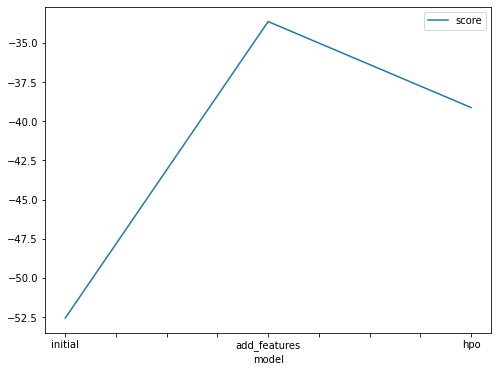

In [42]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.56, -33.63, -39.12]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

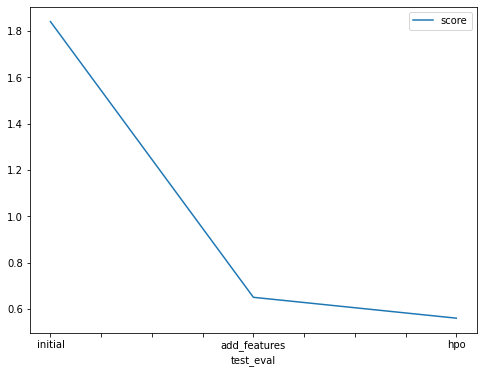

In [43]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.84, 0.65, 0.56]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [45]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "eval_metric": ["root_mean_squared_error", "root_mean_squared_error", "root_mean_squared_error"],
    "time_limit": [600, 600, 900],
    "presets": ["best_quality", "best_quality", "medium_quality"],
    "num_bag_sets": [None, None, 1],
    "individual model parameters": [None, None, "GBM models"],
    "score": [1.84, 0.65, 0.56]
})

model              eval_metric  time_limit         presets  \
0       initial  root_mean_squared_error         600    best_quality   
1  add_features  root_mean_squared_error         600    best_quality   
2           hpo  root_mean_squared_error         900  medium_quality   

   num_bag_sets individual model parameters  score  
0           NaN                        None   1.84  
1           NaN                        None   0.65  
2           1.0                  GBM models   0.56